In [31]:
%load_ext autoreload
%autoreload 2

# Define autoreload so that we don't have to reset the kernel every time after changing the files

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
# Define the system paths
import sys
from pathlib import Path

project_root = Path.cwd().resolve().parents[2] # Gets the GitHub repo folder
print(project_root)
sys.path.append(str(project_root))

# Import modules

import pandas as pd
import matplotlib.pyplot as plt

C:\SenkDosya\Projects\FINCH-Science_SyntheticData


In [33]:
# Import code

from defs.helper.noising.noising import *
from defs.helper.plotting.plotting import *

In [34]:
# Import data

df = pd.read_csv(r'C:\SenkDosya\UTAT\Data\General_Data\simpler_data_rwc.csv')

data = df.iloc[:, 7:].to_numpy(dtype=np.float64)

print(data)


[[0.05945142 0.06440255 0.07002581 ... 0.20288342 0.08395094 0.02406419]
 [0.05861448 0.06322138 0.06855085 ... 0.06126626 0.10420719 0.03176397]
 [0.04946129 0.0532802  0.05762918 ... 0.22723868 0.03629987 0.01058028]
 ...
 [0.02633246 0.02696881 0.02848575 ... 0.08798267 0.19825926 0.18957973]
 [0.02626704 0.02579437 0.02756352 ... 0.0990945  0.11365661 0.17497927]
 [0.0250598  0.02427512 0.02545164 ... 0.0735709  0.11222987 0.22417896]]


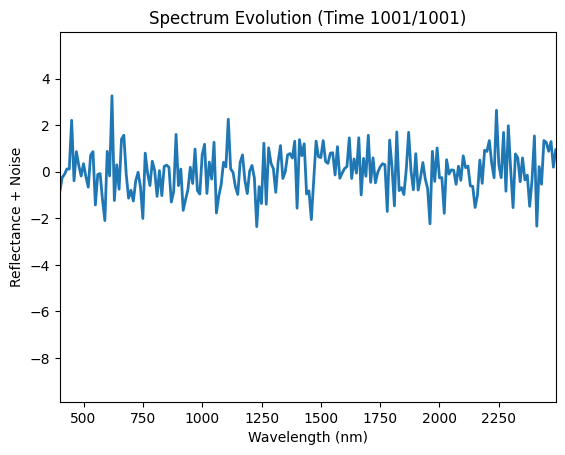

In [35]:
trial_index = 0
t_max = 1000
exp = 2
offset = 0.0008

Cosine = CosSchedule(steps=t_max, offset=offset, exp=exp)

trial_spectrum = data[trial_index,]
wavelengths = np.arange(start= 400, stop= 2500, step=10)

matrix = np.zeros(shape=(t_max + 1, 210))

for i in range(1001):
    matrix[i] = Cosine.add_noise(trial_spectrum, i)

animate_change(spectral_matrix=matrix, wavelengths=wavelengths, interval=100, repeat=True, save_path=r"C:\SenkDosya\Projects\FINCH-Science_SyntheticData\defs\helper\plotting\trial.gif")


